In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm,kstest,shapiro,t
from scipy.optimize import fsolve
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import *
import statistics

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Basic Functions

In [3]:
def black_scholes(S,K,T,r,q,sigma,option_dir):
  d1 = (np.log(S/K)+(r-q+sigma**2/2)*T)/(sigma*np.sqrt(T))
  d2 = d1-sigma*np.sqrt(T)
  if option_dir == "Call":
    return S*np.exp(-q*T)*norm.cdf(d1)-K*np.exp(-r*T)*norm.cdf(d2)
  else:
    return K*np.exp(-r*T)*norm.cdf(-d2)-S*np.exp(-q*T)*norm.cdf(-d1)

In [4]:
def implied_volatility(S,K,T,r,q,opt_price,call=True):
  volatility = lambda x: black_scholes(S,K,T,r,q,x,call) - opt_price
  return fsolve(volatility, x0 = 0.5)[0]

In [56]:
def simulate_history(df, alpha):
  VaR = -np.percentile(df,alpha)
  print(f"Historic Simulation VaR: {round(VaR*100,2)}%")
  return VaR

In [57]:
def ES(ret_arr, alpha):
  VaR_t = -np.percentile(ret_arr, alpha)
  return_before_alpha = ret_arr[ret_arr < -VaR_t]
  ES = return_before_alpha.mean()
  print(f"Expected Shortfall: {round(-ES*100,2)}%")
  return -ES

# Question1

In [5]:
def cal_TTM(current, expiration):
  TTM = expiration-current
  print(f"The time to maturity of the option is {TTM.days} days")
  return TTM

In [6]:
current = datetime(2022,2,25)
expiration = datetime(2022,3,18)
TTM = cal_TTM(current, expiration)

The time to maturity of the option is 21 days


In [7]:
S = 165
K = 165
T = TTM.days/365
r = 0.25/100
q = 0.53/100

In [8]:
def show_q1_results():
  sigmas = np.linspace(0.1, 0.8, 8)
  call_prices = []
  put_prices = []
  dif = []
  for sig in sigmas:
    call = black_scholes(S,K,T,r,q,sig,"Call")
    put = black_scholes(S,K,T,r,q,sig,"Put")
    call_prices.append(call)
    put_prices.append(put)
    dif.append(put-call)
  data = pd.DataFrame({'call':call_prices,'put':put_prices},index = sigmas)
  data1 = pd.DataFrame({'call-put difference':dif},index = sigmas)
  data1.plot()
  return data

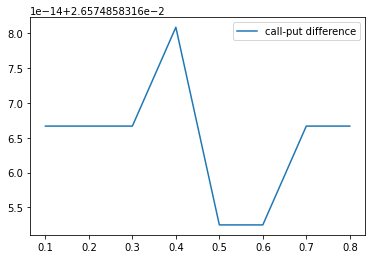

In [9]:
data = show_q1_results()

In [10]:
data

,call,put
0.1,1.565266,1.591840
0.2,3.143538,3.170113
0.3,4.721369,4.747943
0.4,6.298521,6.325096
0.5,7.874768,7.901343
0.6,9.449882,9.476457
0.7,11.023638,11.050213
0.8,12.595810,12.622385


# Question 2

In [16]:
def cal_implied_volatility(data_set):
  S = 164.85
  K = data_set['Strike']
  Type = data_set['Type']
  opt_price = data_set['Last Price']
  vol = []
  for i in range(len(K)):
    vol.append(implied_volatility(S,K[i],T,r,q,opt_price[i],Type[i]))
  data_set['Implied vol'] = np.array(vol)
  return data_set

In [17]:
AAPL = pd.read_csv('/content/drive/MyDrive/risk data/AAPL_Options.csv')

In [18]:
AAPL = cal_implied_volatility(AAPL)

In [19]:
AAPL

,Stock,Expiration,Type,Strike,Last Price,Implied vol
0,AAPL,3/18/2022,Call,135.0,30.175,0.499898
1,AAPL,3/18/2022,Call,140.0,25.300,0.452886
2,AAPL,3/18/2022,Call,145.0,20.525,0.412720
3,AAPL,3/18/2022,Call,150.0,15.850,0.369706
4,AAPL,3/18/2022,Call,155.0,11.525,0.340394
5,AAPL,3/18/2022,Call,160.0,7.525,0.304316
6,AAPL,3/18/2022,Call,165.0,4.225,0.273378
7,AAPL,3/18/2022,Call,170.0,1.935,0.249889
8,AAPL,3/18/2022,Call,175.0,0.715,0.235938
9,AAPL,3/18/2022,Call,180.0,0.260,0.237799


In [22]:
def plot_q2_results(data_set):
  fig, axes = plt.subplots(figsize=(8,5))
  call = data_set[data_set['Type']=='Call']
  put = data_set[data_set['Type']=='Put']
  axes.scatter(x = call['Strike'], y = call['Implied vol'], label = 'call')
  axes.scatter(x = put['Strike'], y = put['Implied vol'],label = 'put')
  axes.axvline(x = S, linestyle='dashed', alpha=0.5)
  axes.axvline(164.85, 0, 1, linestyle='--', alpha=0.7, color="green")
  axes.set_xlabel("Strike Price")
  axes.set_ylabel("Implied Volatility")
  plt.legend()
  return

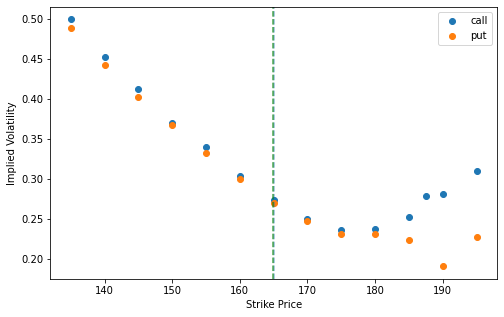

In [23]:
plot_q2_results(AAPL)

# Question3

In [10]:
portfolio = pd.read_csv('/content/drive/MyDrive/risk data/problem3.csv')

In [11]:
def cal_implied_volatility(data_set):
  S = 164.85
  K = data_set['Strike']
  Type = data_set['OptionType']
  opt_price = data_set['CurrentPrice']
  vol = []
  for i in range(len(K)):
    if (Type[i] == "Call") or (Type[i] == "Put"):
      vol.append(implied_volatility(S,K[i],T,r,q,opt_price[i],Type[i]))
    else:
      vol.append(np.NaN)
  data_set['Implied vol'] = np.array(vol)
  return data_set

In [12]:
portfolio = cal_implied_volatility(portfolio)

In [13]:
portfolio

,Portfolio,Type,Underlying,Holding,OptionType,ExpirationDate,Strike,CurrentPrice,Implied vol
0,Straddle,Option,AAPL,1,Call,3/18/2022,165.0,4.50,0.290819
1,Straddle,Option,AAPL,1,Put,3/18/2022,165.0,4.40,0.273281
2,SynLong,Option,AAPL,1,Call,3/18/2022,165.0,4.50,0.290819
3,SynLong,Option,AAPL,-1,Put,3/18/2022,165.0,4.40,0.273281
4,CallSpread,Option,AAPL,1,Call,3/18/2022,165.0,4.50,0.290819
5,CallSpread,Option,AAPL,-1,Call,3/18/2022,175.0,0.72,0.236476
6,PutSpread,Option,AAPL,1,Put,3/18/2022,165.0,4.40,0.273281
7,PutSpread,Option,AAPL,-1,Put,3/18/2022,155.0,1.60,0.331380
8,Stock,Stock,AAPL,1,NaN,NaN,NaN,164.85,NaN
9,Call,Option,AAPL,1,Call,3/18/2022,165.0,4.50,0.290819


In [15]:
def portfolio_value(data_set, underlying_values, simulated_date):
  value_dataframe = pd.DataFrame(data_set['Portfolio'])
  Type = data_set['OptionType']
  for S in underlying_values:
    port_value = []
    for i in range(len(Type)):
      if (Type[i] == "Call") or (Type[i] == "Put"):
        expiration = pd.to_datetime(data_set['ExpirationDate'][i])
        current = simulated_date
        T = (expiration-current).days/365
        K = data_set["Strike"][i]
        sigma = data_set["Implied vol"][i]
        value = black_scholes(S,K,T,r,q,sigma,Type[i])*data_set["Holding"][i]
        port_value.append(value)
      else:
        port_value.append(S)

    value_dataframe[str(S)] = np.array(port_value)
  value_dataframe = value_dataframe.groupby('Portfolio').sum()
  return value_dataframe.T

In [16]:
underlying_values = list(range(100,230))
value_dataframe = portfolio_value(portfolio, underlying_values, datetime(2022,2,25))
round(value_dataframe,6)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


Portfolio,Call,CallSpread,CoveredCall,ProtectedPut,Put,PutSpread,Stock,Straddle,SynLong
100,0.000000,0.000000,100.000000,165.006757,65.006757,9.998562,100.0,65.006757,-65.006757
101,0.000000,0.000000,101.000000,165.007062,64.007062,9.998562,101.0,64.007062,-64.007062
102,0.000000,0.000000,102.000000,165.007367,63.007367,9.998562,102.0,63.007367,-63.007367
103,0.000000,0.000000,103.000000,165.007672,62.007672,9.998562,103.0,62.007672,-62.007672
104,0.000000,0.000000,104.000000,165.007977,61.007977,9.998561,104.0,61.007977,-61.007977
...,...,...,...,...,...,...,...,...,...
225,59.955144,9.998563,165.044856,225.000003,0.000003,-0.000001,225.0,59.955147,59.955142
226,60.954836,9.998563,165.045164,226.000002,0.000002,-0.000001,226.0,60.954838,60.954834
227,61.954529,9.998563,165.045471,227.000001,0.000001,-0.000001,227.0,61.954530,61.954527
228,62.954222,9.998563,165.045778,228.000001,0.000001,-0.000001,228.0,62.954223,62.954221


In [17]:
def plot_q3_1_results(data_set):
  fig, axes = plt.subplots(3, 3, figsize=(18, 18))
  i=0
  for p in data_set.columns:
    ax = axes[i//3][i%3]
    data_set[p].plot(ax = ax)
    ax.set_title(p)
    ax.set_xlabel("Price")
    ax.set_ylabel("Portfolio Value")
    ax.axvline(x = S-100, linestyle='dashed', alpha=0.5)
    i+=1
  return

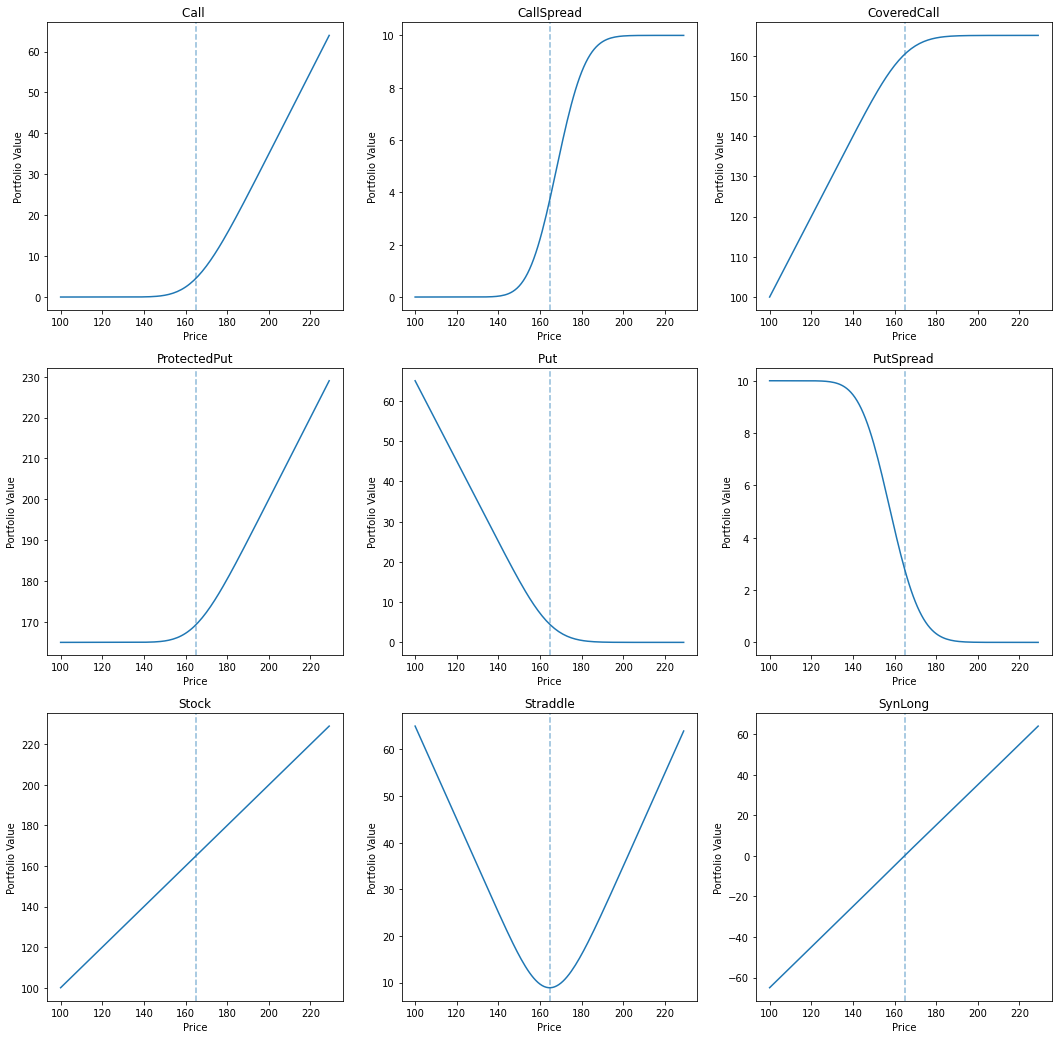

In [18]:
plot_q3_1_results(value_dataframe)

In [25]:
data_set = pd.read_csv("/content/drive/MyDrive/risk data/DailyReturn.csv",index_col=0)
returns = data_set['AAPL']

In [50]:
def simulate_AAPL_price(S, data_set, sample_size):
  sigma = data_set.std()
  i = 0
  simu_AAPL = []
  while(i < sample_size):
    return_simu = norm.rvs(0,sigma,10)
    j = 0
    price = S
    for j in range(0,10):
      price = price * (1+return_simu[j])
      j = j+1
    simu_AAPL.append(price)
    i = i+1
  return simu_AAPL

In [46]:
sigma = returns.std()
return_simu = norm.rvs(0,sigma,10)

In [51]:
S = 164.85
simu_AAPL = simulate_AAPL_price(S, returns, 2000)

In [35]:
simu_AAPL

,0,1,2,3,4,5,6,7,8,9
0,162.435533,165.248521,160.810588,166.902162,164.353140,167.947377,166.005565,163.743239,166.484436,163.401748
1,166.432084,164.461563,166.292697,166.650184,166.409542,165.928883,164.154347,162.950827,164.606150,165.950683
2,165.536934,165.621669,166.614745,161.873546,164.964602,163.544961,166.418360,162.589061,170.564784,166.675680
3,165.583267,162.770590,163.424953,163.342408,162.022223,163.301368,165.584048,162.687396,168.069699,159.072126
4,160.382889,169.246551,160.505721,165.003444,171.009482,169.389457,164.836706,163.942309,167.265859,163.885336
...,...,...,...,...,...,...,...,...,...,...
1995,167.348282,168.445125,164.082795,162.173188,165.850588,160.361177,165.117028,164.720055,162.997937,165.628547
1996,167.584319,165.711656,167.218156,166.904694,166.337498,166.721319,166.424172,165.425267,165.850370,163.855083
1997,162.415947,167.128583,164.905502,164.483154,169.781169,162.054867,170.343940,161.836505,162.322618,169.142327
1998,162.359532,164.542137,165.870578,164.965974,167.421814,161.751311,164.151187,164.159752,168.182235,165.838326


In [54]:
Pred_PortfolioVal = portfolio_value(portfolio, simu_AAPL,datetime(2022,3,7))
Pred_PortfolioVal

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


Portfolio,Call,CallSpread,CoveredCall,ProtectedPut,Put,PutSpread,Stock,Straddle,SynLong
171.74019427732406,7.762123,6.265096,163.978072,172.630650,0.890455,0.750085,171.740194,8.652578,6.871667
170.7802912180562,7.016782,5.813390,163.763510,171.872304,1.092013,0.914073,170.780291,8.108794,5.924769
160.94213211603858,1.639861,1.587632,159.302271,166.479456,5.537324,4.131875,160.942132,7.177185,-3.897463
164.6673706359085,3.148816,2.937322,161.518555,167.962742,3.295371,2.600418,164.667371,6.444187,-0.146555
159.6571527733964,1.265060,1.234918,158.392093,166.121138,6.463985,4.710947,159.657153,7.729045,-5.198925
...,...,...,...,...,...,...,...,...,...
152.61958129187303,0.210885,0.210139,152.408696,165.168813,12.549232,7.695321,152.619581,12.760117,-12.338347
161.63919170335794,1.873203,1.803867,159.765988,166.705217,5.066025,3.825178,161.639192,6.939229,-3.192822
179.80951184301654,14.951881,9.042349,164.857631,179.923232,0.113720,0.098719,179.809512,15.065600,14.838161
156.17794339090986,0.566939,0.561304,155.611005,165.475857,9.297914,6.280190,156.177943,9.864853,-8.730975


In [60]:
def cal_portfolio_risk_metrics(data_set, predict_set, alpha):
  Strategy = data_set['Portfolio'].unique()
  Port_pv = []
  for i in range(len(Strategy)):
    data = data_set[data_set['Portfolio']==Strategy[i]] 
    pv = (data['CurrentPrice']*data['Holding']).sum()
    Port_pv.append(pv)
    
  PredMean = []
  PredVaR = []
  PredES = []
  Pred_Profit = pd.DataFrame()

  for i in range(len(Strategy)):
    Profit = (Pred_PortfolioVal[Strategy[i]]-Port_pv[i]).values
    Pred_Profit[Strategy[i]] = Profit
    PredMean.append(Profit.mean())
    PredVaR.append(simulate_history(Profit, alpha))
    PredES.append(ES(Profit, alpha))

  risk_metrics = pd.DataFrame({"Mean":PredMean,'VaR':PredVaR,'ES':PredES},index = Strategy)
  risk_metrics
  return Pred_Profit, risk_metrics

In [61]:
Pred_Profit, risk_metrics = cal_portfolio_risk_metrics(portfolio, Pred_PortfolioVal, 5)

Historic Simulation VaR: 244.21%
Expected Shortfall: 245.27%
Historic Simulation VaR: 1368.25%
Expected Shortfall: 1666.66%
Historic Simulation VaR: 363.69%
Expected Shortfall: 371.12%
Historic Simulation VaR: 267.96%
Expected Shortfall: 274.07%
Historic Simulation VaR: 1346.15%
Expected Shortfall: 1642.74%
Historic Simulation VaR: 435.66%
Expected Shortfall: 443.1%
Historic Simulation VaR: 426.11%
Expected Shortfall: 433.18%
Historic Simulation VaR: 910.49%
Expected Shortfall: 1199.63%
Historic Simulation VaR: 413.56%
Expected Shortfall: 419.18%


In [62]:
risk_metrics

,Mean,VaR,ES
Straddle,0.324467,2.442145,2.452667
SynLong,0.127025,13.682455,16.666597
CallSpread,-0.147681,3.636945,3.711153
PutSpread,0.292053,2.679557,2.740726
Stock,0.250977,13.461481,16.427392
Call,0.225746,4.356602,4.431042
Put,0.098721,4.261091,4.331759
CoveredCall,0.025230,9.104879,11.996350
ProtectedPut,0.349698,4.135627,4.191836


In [63]:
Pred_Profit

,Straddle,SynLong,CallSpread,PutSpread,Stock,Call,Put,CoveredCall,ProtectedPut
0,-0.247422,6.771667,2.485096,-2.049915,6.890194,3.262123,-3.509545,3.628072,3.380650
1,-0.791206,5.824769,2.033390,-1.885927,5.930291,2.516782,-3.307987,3.413510,2.622304
2,-1.722815,-3.997463,-2.192368,1.331875,-3.907868,-2.860139,1.137324,-1.047729,-2.770544
3,-2.455813,-0.246555,-0.842678,-0.199582,-0.182629,-1.351184,-1.104629,1.168555,-1.287258
4,-1.170955,-5.298925,-2.545082,1.910947,-5.192847,-3.234940,2.063985,-1.957907,-3.128862
...,...,...,...,...,...,...,...,...,...
1995,3.860117,-12.438347,-3.569861,4.895321,-12.230419,-4.289115,8.149232,-7.941304,-4.081187
1996,-1.960771,-3.292822,-1.976133,1.025178,-3.210808,-2.626797,0.666025,-0.584012,-2.544783
1997,6.165600,14.738161,5.262349,-2.701281,14.959512,10.451881,-4.286280,4.507631,10.673232
1998,0.964853,-8.830975,-3.218696,3.480190,-8.672057,-3.933061,4.897914,-4.738995,-3.774143


In [79]:
def plot_q3_2_results(Pred_Profit, risk_metrics):
  rets_sim = Pred_Profit.reset_index(drop=True)
  i=0
  fig, axes = plt.subplots(3, 3, figsize=(18, 12))
  Strategy = Pred_Profit.columns.values
  for i in range(len(Strategy)):
    ax = axes[i//3][i%3]
    sns.histplot(rets_sim[Strategy[i]], ax=ax, stat='density', label='Simulated Return')
    sns.kdeplot(rets_sim[Strategy[i]], ax=ax, color = 'r')
    ret, ret_density = ax.lines[0].get_data()
    ax.fill_between(ret, ret_density, where=(ret<-risk_metrics.loc[Strategy[i]].VaR), color='r', alpha=0.5)
    ax.axvline(x = -risk_metrics.loc[Strategy[i]].ES, linestyle='dashed', color = 'g',alpha=1)
    ax.axvline(x = risk_metrics.loc[Strategy[i]].Mean, linestyle='dashed', color = 'b',alpha=0.6)

    i+=1
  return

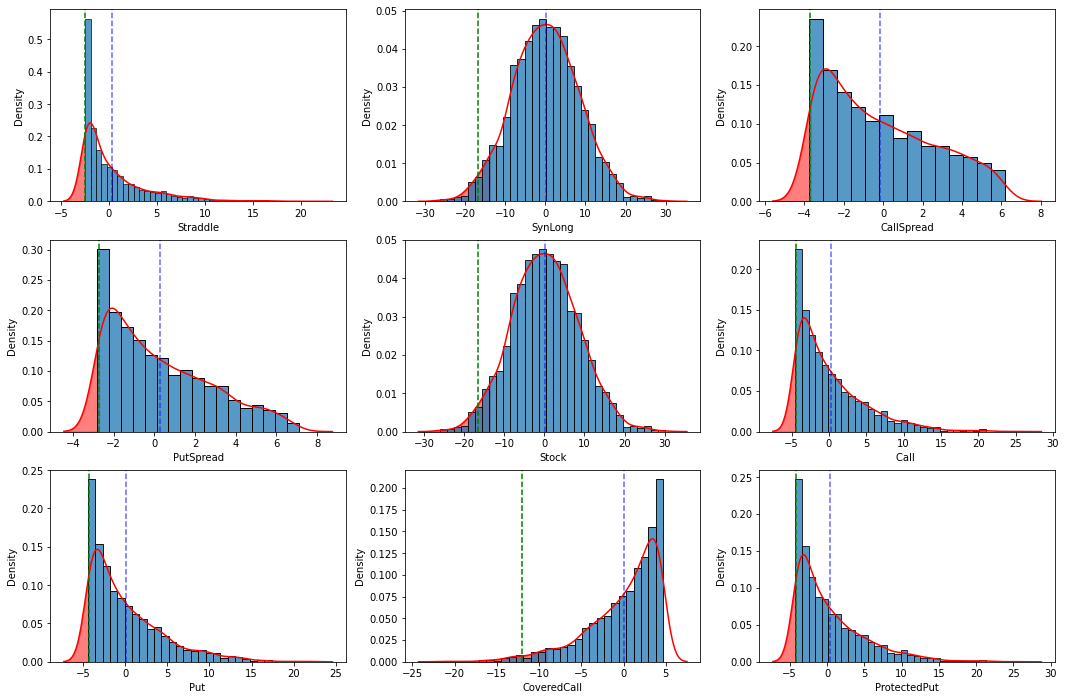

In [80]:
plot_q3_2_results(Pred_Profit, risk_metrics)